In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
#Fetching and concatinating data together
red_wine = pd.read_csv(r'C:\Users\jyoti\Desktop\DATA SCIENCE\Blueberry-Winery\Blueberry-Winery\Dataset\winequality-red.csv' ,sep = ';')
white_wine = pd.read_csv(r'C:\Users\jyoti\Desktop\DATA SCIENCE\Blueberry-Winery\Blueberry-Winery\Dataset\winequality-white.csv', sep=';')

#Diving red and white wine into categories of 'Red' and 'White'
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

#Naming the quality as 'Low', 'Medium' and High'
red_wine['quality_label'] = red_wine['quality'].apply(lambda value:'low' if value  <=6 else 'medium' if value <= 8 else 'high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low','medium','high'])


white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' if value <= 6 else 'medium' if value <= 8 else 'high')

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories= ['low', 'medium' , 'high'])

#Finally concatinating
wines = pd.concat([red_wine,white_wine])
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,low
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


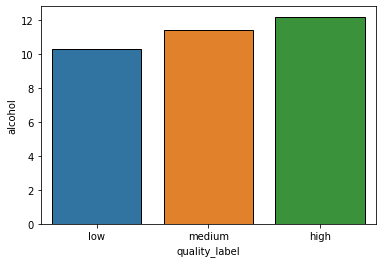

In [13]:
#Checking the alcohol level in different qualities of Wines
sns.barplot(x='quality_label', y = 'alcohol', data=wines, ci=None, edgecolor='Black');

In [15]:
#For modelling, dividing the dataset in 'X' and 'Y'
X = wines.drop (['quality_label', 'wine_type'], axis=1)

y = wines['quality_label']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [17]:
#Applying KNN with instruction to take only 5 neighbors.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
y_predict = knn.predict(X_test)

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)

In [21]:
#Checking the  scroes for KNN
scores = cross_val_score(knn,X,y,cv = 10, scoring='accuracy')

C:\ProgramData\Anaconda3_3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [22]:
print(scores.mean())

0.8155934573900676
